<a href="https://colab.research.google.com/github/anshuiitb/pytorch/blob/main/CNN_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline

from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix


In [65]:
# convert mnist Image file in tensor of 4-Dimension
transforms = transforms.ToTensor()

In [66]:
# train data

train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transforms)

In [67]:
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transforms)

In [68]:
train_loader = DataLoader(train_data , batch_size = 10 , shuffle = True)
test_loader = DataLoader(test_data , batch_size = 10 , shuffle = False)

In [69]:
# define our cnn model
conv1 = nn.Conv2d( 1, 6 , 3 ,1)
conv2 = nn.Conv2d( 6 , 16 , 3 ,1)

In [70]:
#grad 1 Mnist image

In [71]:
for i , (X_train , y_train ) in enumerate(train_data):
  break

In [72]:
X_train.shape

torch.Size([1, 28, 28])

In [73]:
x = X_train.view(1,1,28,28)

In [74]:
x = F.relu(conv1(x))


In [75]:
x.shape

torch.Size([1, 6, 26, 26])

In [76]:
x = F.max_pool2d(x,2,2)

In [77]:
x.shape

torch.Size([1, 6, 13, 13])

In [78]:
# second conv layer
x = F.relu(conv2(x))

In [79]:
x.shape

torch.Size([1, 16, 11, 11])

In [80]:
x = F.max_pool2d(x,2,2)

In [81]:
x.shape

torch.Size([1, 16, 5, 5])

In [82]:
class cnn(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d( 1, 6 , 3 ,1)
    self.conv2 = nn.Conv2d( 6 , 16 , 3 ,1)
    # fully connected layer
    self.fc1 = nn.Linear(5*5*16 , 120)
    self.fc2 = nn.Linear(120 , 84)
    self.fc3 = nn.Linear(84 , 10)


  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2)
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2)
    X = X.view(-1 , 5*5*16)

    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X, dim=1)

In [83]:
torch.manual_seed(41)
model=cnn()
model

cnn(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [84]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [85]:
import time
start_time = time.time()


epochs = 5
train_losses =[]
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
  trn_corr = 0
  tst_corr = 0


  #train
  for b , (X_train , y_train) in enumerate(train_loader):
    b+=1
    y_pred = model(X_train)
    loss = criterion(y_pred , y_train)
    predicted = torch.max(y_pred.data , 1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr+= batch_corr


    #update para
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #print out some resuts
    if b%600 ==0:
      print(f'epoch : {i} , batch : {b} , loss : {loss.item()}')

    train_losses.append(loss)
    train_correct.append(trn_corr)

  #test
with torch.no_grad():
  for b , (X_test , y_test) in enumerate(test_loader):
     y_val = model(X_test)
     predicted = torch.max(y_val.data , 1)[1]
     tst_corr = (predicted == y_test).sum()

  loss = criterion(y_val , y_test)

  test_losses.append(loss)
  test_correct.append(tst_corr)



current_time = time.time()
total = current_time - start_time
print(total/60)

epoch : 0 , batch : 600 , loss : 0.1623610556125641
epoch : 0 , batch : 1200 , loss : 0.1502392590045929
epoch : 0 , batch : 1800 , loss : 0.4744560718536377
epoch : 0 , batch : 2400 , loss : 0.14238706231117249
epoch : 0 , batch : 3000 , loss : 0.007758188061416149
epoch : 0 , batch : 3600 , loss : 0.3836284875869751
epoch : 0 , batch : 4200 , loss : 0.0038223876617848873
epoch : 0 , batch : 4800 , loss : 0.0021286322735249996
epoch : 0 , batch : 5400 , loss : 0.0569545142352581
epoch : 0 , batch : 6000 , loss : 0.00038789428072050214
epoch : 1 , batch : 600 , loss : 0.06289136409759521
epoch : 1 , batch : 1200 , loss : 0.010614877566695213
epoch : 1 , batch : 1800 , loss : 0.03243611007928848
epoch : 1 , batch : 2400 , loss : 0.012448625639081001
epoch : 1 , batch : 3000 , loss : 0.000640809943433851
epoch : 1 , batch : 3600 , loss : 0.0020938280504196882
epoch : 1 , batch : 4200 , loss : 0.3140248656272888
epoch : 1 , batch : 4800 , loss : 0.020231451839208603
epoch : 1 , batch : 54

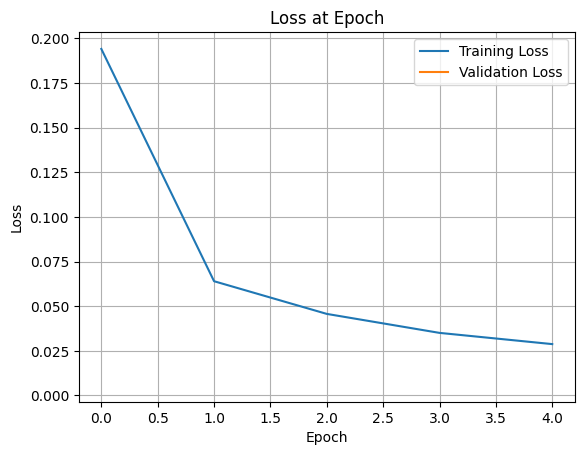

In [88]:
num_batches_per_epoch = 6000  # adjust if different
train_losses_per_epoch = [
    sum(train_losses[i*num_batches_per_epoch:(i+1)*num_batches_per_epoch]) / num_batches_per_epoch
    for i in range(epochs)
]

plt.plot(train_losses_per_epoch, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.title("Loss at Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [93]:
test_data[4143]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [97]:
test_data[4143][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [103]:
test_data[1978][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

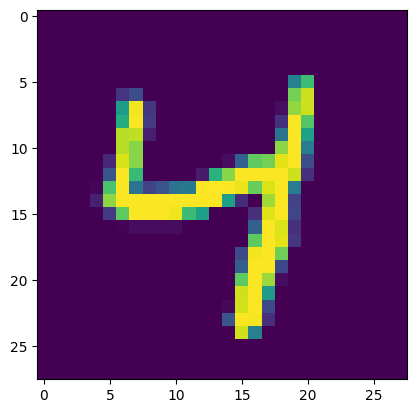

In [104]:
plt.imshow(test_data[1978][0].reshape(28,28))

In [105]:
model.eval()
with torch.no_grad():
  output = model(test_data[1978][0].view(1,1,28,28))

In [106]:
output

tensor([[-2.3304e+01, -1.6301e+01, -2.3155e+01, -2.9682e+01, -3.5763e-07,
         -1.8828e+01, -1.6007e+01, -1.7794e+01, -2.3020e+01, -1.6349e+01]])

In [107]:
output.argmax()

tensor(4)